In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
plt.rc('font', size=12.0)

In [6]:
#cols=['rank', 'thread', 'walker', 'mult', 'log_wgt', 'a', 'alpha', 'param_S', 'param_L',
#      'csq1', 'trans1', 'csq2', 'trans2', 'csq3', 'M_chirp_det', 'q', 'z_cdf', 'm1_gw19']

cols=['rank', 'thread', 'walker', 'mult', 'log_wgt', 'a', 'alpha', 'param_S', 'param_L',
     'exp1', 'trans1', 'exp2', 'trans2', 'exp3', 'M_chirp_det', 'q', 'z_cdf', 'm1_gw19']

nsrc=['6304', '6397', 'M13', 'M28', 'M30', 'wCen', 
      'X7', '1810b', '1724b', '1702', '0030', '0740']
pops=['NS', 'WD', 'LMS']
pstr=['J0453p','J0453c','J1906p','J1906c','B1534p',  'B1534c','B1913p','B1913c',
      'B2127p','B2127c','J0737A','J0737B','J1756p',  'J1756c','J1807p','J1807c',
      'J1518p','J1518c','J1811p','J1811c','J1829p',  'J1829c','J2045', 'J2053',
      'J1713', 'B1855', 'J0751', 'J1141', 'J1738',   'J1614', 'J0348', 'J2222', 'J2234',
      'J1949', 'J1012', 'J0437', 'J1909', 'J1802',   'J1911', 'J2043', 'J0337', 'J1946',
      'J1918', 'J1600', 'J0621', 'B2303', 'J0024',   'J0514', 'B1516', 'J1748I','J1748J',
      'B1802', 'B1911', 'J0740', 'CygX2', 'XTEJ2123','4U1822','HerX1', '2S0921']
for k, star in enumerate(nsrc):
    cols.append('mf_'+nsrc[k])
for k, pop in enumerate(pops):
    cols.append('mean_'+pops[k])
    cols.append('log10_width_'+pops[k])
    cols.append('skewness_'+pops[k])
for k, star in enumerate(pstr):
    cols.append('M_'+pstr[k])
for k, star in enumerate(nsrc):
    cols.append('wgt_'+nsrc[k])
for k, star in enumerate(nsrc):
    cols.append('Rns_'+nsrc[k])
for k, star in enumerate(nsrc):
    cols.append('Mns_'+nsrc[k])
for k in range(100):
    cols.append('P_'+str(k))
    cols.append('cs2_'+str(k))
for k in range(100):
    cols.append('R_'+str(k))
    cols.append('PM_'+str(k))
for k in range(100):
    cols.append('Pnb_'+str(k))
    cols.append('EoA_'+str(k))
pars=['S', 'L', 'R_max', 'M_max', 'dpdM', 'M_max2', 'P_max', 'e_max', 'nb_max']
for k, par in enumerate(pars):
    cols.append(pars[k])
for k, star in enumerate(nsrc):
    cols.append('ce_'+nsrc[k])
for k, star in enumerate(nsrc):
    cols.append('cnb_'+nsrc[k])
for k in range(1,6):
    cols.append('gm_nb'+str(k))
    cols.append('r_nb'+str(k))
pars2=['nt', 'Pt']
for k, par in enumerate(pars2):
    cols.append(pars2[k])
for k in range(100):
    cols.append('CT_'+str(k))
for k in range(100):
    cols.append('MB_'+str(k))
    cols.append('BE_'+str(k))
    cols.append('I_'+str(k))
    cols.append('I_bar_'+str(k))
    cols.append('Lambda_bar_'+str(k))
for k, star in enumerate(nsrc):
    cols.append('atm_'+nsrc[k])
gwps=['M_chirp_gw17', 'm1_gw17', 'm2_gw17', 'R1', 'R2', 'I1', 'I2', 'I_bar1', 'I_bar2',
      'Lambda1', 'Lambda2', 'Lambdat', 'del_Lambdat', 'prob_gw17', 'eta', 'm2_gw19', 'prob_gw19']
for k, gwp in enumerate(gwps):
    cols.append(gwps[k])
for k, star in enumerate(nsrc):
    cols.append('log_wgt_'+nsrc[k])
for k, pop in enumerate(pops):
    cols.append('log_wgt_'+pops[k])
wgts=['log_wgt_pop']
for k, wgt in enumerate(wgts):
    cols.append(wgts[k])
len((cols))

1424

In [3]:
#cols=['rank', 'thread', 'walker', 'mult', 'log_wgt', 'a', 'alpha', 'param_S', 'param_L',
#      'csq1', 'trans1', 'csq2', 'trans2', 'csq3', 'M_chirp_det', 'q', 'z_cdf', 'm1_gw19']
#
#nsrc=['6304', '6397', 'M13', 'M28', 'M30', 'wCen', 
#      'X7', '1810b', '1724b', '1702', '0030', '0740']
#pops=['NS', 'WD', 'LMS']
#pstr=['J0453p','J0453c','J1906p','J1906c','B1534p',  'B1534c','B1913p','B1913c',
#      'B2127p','B2127c','J0737A','J0737B','J1756p',  'J1756c','J1807p','J1807c',
#      'J1518p','J1518c','J1811p','J1811c','J1829p',  'J1829c','J2045', 'J2053',
#      'J1713', 'B1855', 'J0751', 'J1141', 'J1738',   'J1614', 'J0348', 'J2222', 'J2234',
#      'J1949', 'J1012', 'J0437', 'J1909', 'J1802',   'J1911', 'J2043', 'J0337', 'J1946',
#      'J1918', 'J1600', 'J0621', 'B2303', 'J0024',   'J0514', 'B1516', 'J1748I','J1748J',
#      'B1802', 'B1911', 'J0740', 'CygX2', 'XTEJ2123','4U1822','HerX1', '2S0921']
#for k, star in enumerate(nsrc):
#    cols.append('mf_'+nsrc[k])
#for k, pop in enumerate(pops):
#    cols.append('mean_'+pops[k])
#    cols.append('log10_width_'+pops[k])
#    cols.append('skewness_'+pops[k])
#for k, star in enumerate(pstr):
#    cols.append('M_'+pstr[k])
#len(cols)

In [4]:
#file1=h5py.File('np_old','r')
#file2=h5py.File('np_new','r')
#data1=file1['markov_chain_0/data']
#data2=file2['markov_chain_0/data']
#nlines=file1['markov_chain_0/nlines']
#threads=np.array(data1['thread'], dtype=int)
#walkers=np.array(data1['walker'], dtype=int)
#sx=len(cols)
#sy=np.array(nlines)[0]
#table1=np.zeros(sx)
#table2=np.zeros(sx)
#for ix, iy in enumerate(cols):
#    table1[ix]=np.array(data1[cols[ix]])
#    table2[ix]=np.array(data2[cols[ix]])
#ifalse=np.where(table1!=table2)
#colnames=np.array(cols)[ifalse]
#colnames

## Ensemble Averages

In [7]:
file = ['mp_56a0', 'mp_56a1', 'mp_56a2',  'mp_56a3',  'mp_56a4',  'mp_56a5',  'mp_56a6',  'mp_56a7',
        'mp_56a8', 'mp_56a9', 'mp_56a10', 'mp_56a11', 'mp_56a12', 'mp_56a13', 'mp_56a14', 'mp_56a15',
        'np_54a0', 'np_54a1', 'np_54a2',  'np_54a3',  'np_54a4',  'np_54a5',  'np_54a6',  'np_54a7',
        'np_54a8', 'np_54a9', 'np_54a10', 'np_54a11', 'np_54a12', 'np_54a13', 'np_54a14', 'np_54a15']

for j in range(len(file)):

    print('file =', file[j])

    data = h5py.File(file[j], 'r')['markov_chain_0/data']

    table = []
    for k, col in enumerate(cols):
        table.append(np.array(data[cols[k]]))
    table = np.array(table).T
    print('table.shape =', table.shape)

    walkers, n_rows = [], []
    n_thread, n_walker = 8, 64

    for it in range(n_thread):
        for iw in range(n_walker):
            walk = []
            for row in range(table.shape[0]):
                if (table[row][1]==it and table[row][2]==iw):
                    for i in range(int(table[row][3])):
                        walk.append(table[row])
            walk = np.array(walk)
            n_rows.append(walk.shape[0])

    for it in range(n_thread):
        for iw in range(n_walker):
            walk = []
            for row in range(table.shape[0]):
                if (table[row][1]==it and table[row][2]==iw):
                    for i in range(int(table[row][3])):
                        walk.append(table[row])
            walk = np.array(walk)        
            walkers.append(walk[:np.min(n_rows)])

    print('n_rows (min, max) = ', np.min(n_rows), ',', np.max(n_rows))

    walkers = np.array(walkers)
    print('walkers.shape =', walkers.shape)

    average = np.mean(walkers, axis=0)
    print('average.shape =', average.shape)

    hf = h5py.File('avgs/'+file[j]+'.h5', 'w')
    for i in range(len(cols)):
        hf.create_dataset(cols[i], data=average[:,i])
    hf.close()

    del data, table, walk, walkers, n_rows, average

    print('')

file = mp_56a0
table.shape = (5623, 1424)
n_rows (min, max) =  1425 , 1426
walkers.shape = (512, 1425, 1424)
average.shape = (1425, 1424)

file = mp_56a1
table.shape = (5440, 1424)
n_rows (min, max) =  1416 , 1417
walkers.shape = (512, 1416, 1424)
average.shape = (1416, 1424)

file = mp_56a2
table.shape = (5379, 1424)
n_rows (min, max) =  1420 , 1421
walkers.shape = (512, 1420, 1424)
average.shape = (1420, 1424)

file = mp_56a3
table.shape = (5643, 1424)
n_rows (min, max) =  1416 , 1417
walkers.shape = (512, 1416, 1424)
average.shape = (1416, 1424)

file = mp_56a4
table.shape = (5504, 1424)
n_rows (min, max) =  1436 , 1437
walkers.shape = (512, 1436, 1424)
average.shape = (1436, 1424)

file = mp_56a5
table.shape = (5281, 1424)
n_rows (min, max) =  1412 , 1413
walkers.shape = (512, 1412, 1424)
average.shape = (1412, 1424)

file = mp_56a6
table.shape = (5674, 1424)
n_rows (min, max) =  1420 , 1421
walkers.shape = (512, 1420, 1424)
average.shape = (1420, 1424)

file = mp_56a7
table.shape 

## MCMC Progress: Trace Plots

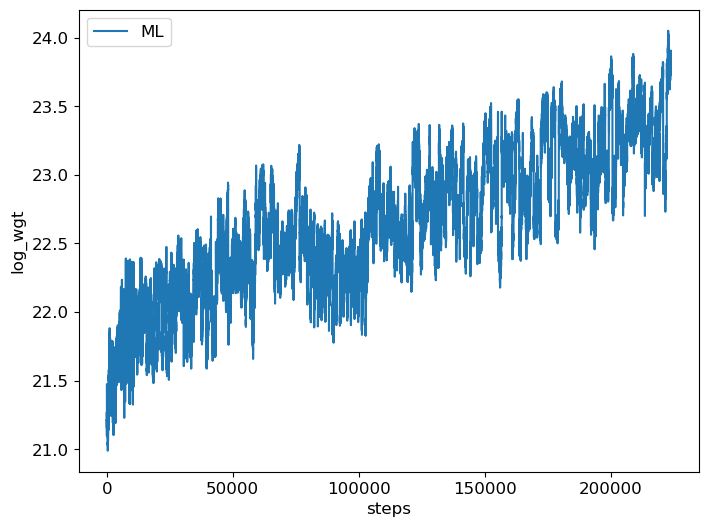

In [10]:
file = [#'ml_31',  'ml_32',  'ml_33',  'ml_34', 'ml_35', 'ml_36', 'ml_37', 'ml_38',  'ml_38b', 'ml_39', 
        #'ml_40',  'ml_40b', 'ml_41',  'ml_42', 'ml_42b', 'ml_43', 'ml_44', 'ml_45', 'ml_46', 'ml_46b', 'ml_47',      
        'ml_48', 'ml_49', 'ml_50', 'ml_51',  'ml_52',  'ml_53',  'ml_54',  'ml_55', 'ml_56', 'ml_57', 
        'ml_58', 'ml_59', 'ml_60',  'ml_60b', 'ml_61',  'ml_61b', 'ml_62', 'ml_63',  'ml_64', 'ml_65',
       ]

log_wgt = []
for i in range(len(file)):
    log_wgt.append(np.array(h5py.File('avgs/'+file[i]+'.h5', 'r')['log_wgt']))

wgt = []
for i in range(len(log_wgt)):
    for j in range(len(log_wgt[i])):
        wgt.append(log_wgt[i][j])

plt.figure(figsize=(8,6))
plt.plot(wgt, label='ML')
plt.xlabel('steps')
plt.ylabel('log_wgt')
plt.legend()
plt.show()

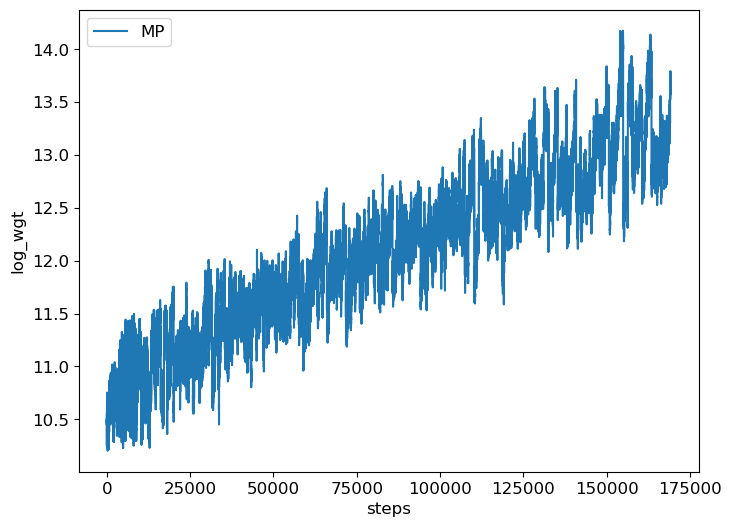

In [11]:
file = [#'mp_32', 'mp_33', 'mp_34', 'mp_35', 'mp_36', 'mp_37', 'mp_38', 'mp_38b', 'mp_39', 'mp_40',   
        'mp_41', 'mp_42', 'mp_43', 'mp_44', 'mp_45', 'mp_46',  'mp_47', 'mp_48', 
        'mp_49', 'mp_50', 'mp_51', 'mp_52', 'mp_53', 'mp_53b', 'mp_54', 'mp_55',
        'mp_56a0', 'mp_56a1', 'mp_56a2',  'mp_56a3',  'mp_56a4',  'mp_56a5',  'mp_56a6',  'mp_56a7',
        'mp_56a8', 'mp_56a9', 'mp_56a10', 'mp_56a11', 'mp_56a12', 'mp_56a13', 'mp_56a14', 'mp_56a15']

log_wgt = []
for i in range(len(file)):
    log_wgt.append(np.array(h5py.File('avgs/'+file[i]+'.h5', 'r')['log_wgt']))

wgt = []
for i in range(len(log_wgt)):
    for j in range(len(log_wgt[i])):
        wgt.append(log_wgt[i][j])

plt.figure(figsize=(8,6))
plt.plot(wgt, label='MP')
plt.xlabel('steps')
plt.ylabel('log_wgt')
plt.legend()
plt.show()

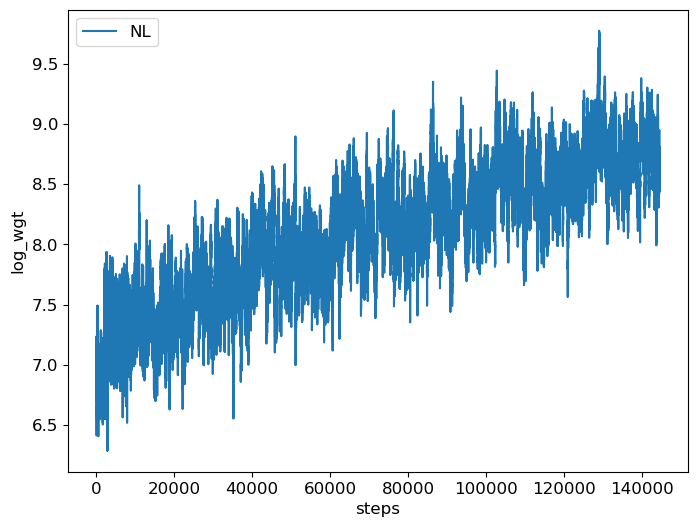

In [5]:
file = [#'nl_28', 'nl_29', 'nl_30', 'nl_31', 'nl_32', 'nl_33', 'nl_34', 'nl_35', 'nl_36', 'nl_37', 'nl_38', 'nl_38b', 'nl_39', 'nl_40'
        'nl_41',   'nl_42',   'nl_43',    'nl_44',    'nl_45',    'nl_46',    'nl_47',    'nl_48',
        'nl_49a0', 'nl_49a1', 'nl_49a2',  'nl_49a3',  'nl_49a4',  'nl_49a5',  'nl_49a6',  'nl_49a7', 
        'nl_49a8', 'nl_49a9', 'nl_49a10', 'nl_49a11', 'nl_49a12', 'nl_49a13', 'nl_49a14', 'nl_49a15',
        'nl_50a0', 'nl_50a1', 'nl_50a2',  'nl_50a3',  'nl_50a4',  'nl_50a5',  'nl_50a6',  'nl_50a7',
        'nl_50a8', 'nl_50a9', 'nl_50a10', 'nl_50a11', 'nl_50a12', 'nl_50a13', 'nl_50a14', 'nl_50a15',
        'nl_51a0', 'nl_51a1', 'nl_51a2',  'nl_51a3',  'nl_51a4',  'nl_51a5',  'nl_51a6',  'nl_51a7',
        'nl_51a8', 'nl_51a9', 'nl_51a10', 'nl_51a11', 'nl_51a12', 'nl_51a13', 'nl_51a14', 'nl_51a15',
        'nl_52a0', 'nl_52a1', 'nl_52a2',  'nl_52a3',  'nl_52a4',  'nl_52a5',  'nl_52a6',  'nl_52a7',
        'nl_52a8', 'nl_52a9', 'nl_52a10', 'nl_52a11', 'nl_52a12', 'nl_52a13', 'nl_52a14', 'nl_52a15',
        'nl_52b0', 'nl_52b1', 'nl_52b2',  'nl_52b3',  'nl_52b4',  'nl_52b5',  'nl_52b6',  'nl_52b7',
        'nl_52b8', 'nl_52b9', 'nl_52b10', 'nl_52b11', 'nl_52b12', 'nl_52b13', 'nl_52b14', 'nl_52b15',
        'nl_53a0', 'nl_53a1', 'nl_53a2',  'nl_53a3',  'nl_53a4',  'nl_53a5',  'nl_53a6',  'nl_53a7',
        'nl_53a8', 'nl_53a9', 'nl_53a10', 'nl_53a11', 'nl_53a12', 'nl_53a13', 'nl_53a14', 'nl_53a15',
        'nl_54a0', 'nl_54a1', 'nl_54a2',  'nl_54a3',  'nl_54a4',  'nl_54a5',  'nl_54a6',  'nl_54a7',
        'nl_54a8', 'nl_54a9', 'nl_54a10', 'nl_54a11', 'nl_54a12', 'nl_54a13', 'nl_54a14', 'nl_54a15',]

log_wgt = []
for i in range(len(file)):
    log_wgt.append(np.array(h5py.File('avgs/'+file[i]+'.h5', 'r')['log_wgt']))

wgt = []
for i in range(len(log_wgt)):
    for j in range(len(log_wgt[i])):
        wgt.append(log_wgt[i][j])

plt.figure(figsize=(8,6))
plt.plot(wgt, label='NL')
plt.xlabel('steps')
plt.ylabel('log_wgt')
plt.legend()
plt.show()

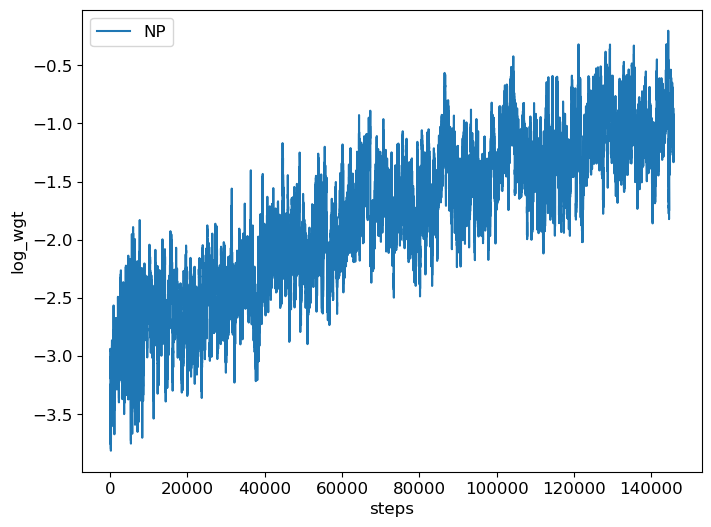

In [9]:
file = [#'np_30', 'np_31', 'np_32', 'np_33', 'np_34', 'np_35', 'np_36', 'np_37', 'np_38', 'np_38b', 'np_39', 'np_40', 
        'np_41', 'np_42', 'np_43', 'np_44', 'np_45', 'np_46', 'np_47', 'np_48',
        'np_49a0', 'np_49a1', 'np_49a2',  'np_49a3',  'np_49a4',  'np_49a5',  'np_49a6',  'np_49a7', 
        'np_49a8', 'np_49a9', 'np_49a10', 'np_49a11', 'np_49a12', 'np_49a13', 'np_49a14', 'np_49a15',
        'np_50a0', 'np_50a1', 'np_50a2',  'np_50a3',  'np_50a4',  'np_50a5',  'np_50a6',  'np_50a7',
        'np_50a8', 'np_50a9', 'np_50a10', 'np_50a11', 'np_50a12', 'np_50a13', 'np_50a14', 'np_50a15',
        'np_51a0', 'np_51a1', 'np_51a2',  'np_51a3',  'np_51a4',  'np_51a5',  'np_51a6',  'np_51a7',
        'np_51a8', 'np_51a9', 'np_51a10', 'np_51a11', 'np_51a12', 'np_51a13', 'np_51a14', 'np_51a15',
        'np_52a0', 'np_52a1', 'np_52a2',  'np_52a3',  'np_52a4',  'np_52a5',  'np_52a6',  'np_52a7',
        'np_52a8', 'np_52a9', 'np_52a10', 'np_52a11', 'np_52a12', 'np_52a13', 'np_52a14', 'np_52a15',
        'np_52b0', 'np_52b1', 'np_52b2',  'np_52b3',  'np_52b4',  'np_52b5',  'np_52b6',  'np_52b7',
        'np_52b8', 'np_52b9', 'np_52b10', 'np_52b11', 'np_52b12', 'np_52b13', 'np_52b14', 'np_52b15',
        'np_53a0', 'np_53a1', 'np_53a2',  'np_53a3',  'np_53a4',  'np_53a5',  'np_53a6',  'np_53a7',
        'np_53a8', 'np_53a9', 'np_53a10', 'np_53a11', 'np_53a12', 'np_53a13', 'np_53a14', 'np_53a15',
        'np_54a0', 'np_54a1', 'np_54a2',  'np_54a3',  'np_54a4',  'np_54a5',  'np_54a6',  'np_54a7',
        'np_54a8', 'np_54a9', 'np_54a10', 'np_54a11', 'np_54a12', 'np_54a13', 'np_54a14', 'np_54a15']

log_wgt = []
for i in range(len(file)):
    log_wgt.append(np.array(h5py.File('avgs/'+file[i]+'.h5', 'r')['log_wgt']))

wgt = []
for i in range(len(log_wgt)):
    for j in range(len(log_wgt[i])):
        wgt.append(log_wgt[i][j])

plt.figure(figsize=(8,6))
plt.plot(wgt, label='NP')
plt.xlabel('steps')
plt.ylabel('log_wgt')
plt.legend()
plt.show()

## Autocorrelation Lengths

In [ ]:
a = np.array(h5py.File('avgs/ml_64.h5', 'r')['a'])

In [ ]:
import statsmodels.api as sm
import pandas as pd
lags = np.arange(1, 11335)
acor = sm.tsa.acf(a, nlags=len(lags)-1)
plt.figure(figsize=(8,6))
plt.plot(lags, acor, label='statsmodels')
a_ts = pd.Series(a)
acor = np.zeros(len(lags))
for i in range(len(lags)):
    acor[i] = a_ts.autocorr(lag=lags[i])
plt.plot(lags, acor, label='pandas')
plt.title('Autocorrelation: $a$')
plt.xlabel('Lag')
plt.ylabel('Autocorr. Coeff.')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.grid(which='major', linewidth=0.2, visible=True)
plt.grid(which='minor', linewidth=0.1, visible=True)
plt.legend()
plt.show()

In [ ]:
import acor
a_ts = pd.Series(a)
tau, mean, sigma = acor.acor(a_ts)

## Check for Frozen Walkers

In [ ]:
i_rank   = np.arange(16)
i_thread = np.arange(16)
i_walker = np.arange(32)

In [ ]:
data   = h5py.File('ml_65', 'r')['markov_chain_0']['data']
nlines = np.array(h5py.File('tmp2/ml_64b', 'r')['markov_chain_0']['nlines'])
rank   = np.array(data['rank'],   dtype=int)
thread = np.array(data['thread'], dtype=int)
walker = np.array(data['walker'], dtype=int)

In [ ]:
for it in i_thread:
    for iw in i_walker:
        i = np.where((rank==0) & (thread==it) & (walker==iw))[0]
        if len(i)<=1:
            print(i, it, iw)

## Correlation Test: Output Quantities

In [ ]:
file_ml= h5py.File('tmp/esmr_ML.o2','r')
list(file_ml.keys())
prob_ml = file_ml['ed_pr_3d']['data']['prob']

In [ ]:
mmax_nl  = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_nl = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_nl   = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['R_53'])
p23_nl   = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_nl   = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_nl = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_nl = np.array(h5py.File('tmp/main2_NL.o2','r')['markov_chain_0']['data']['SN_WD'])

mmax_np  = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_np = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_np   = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['R_53'])
p23_np   = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_np   = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_np = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_np = np.array(h5py.File('tmp/main2_NP.o2','r')['markov_chain_0']['data']['SN_WD'])

mmax_ml  = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_ml = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_ml   = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['R_53'])
p23_ml   = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_ml   = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_ml = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_ml = np.array(h5py.File('tmp/main2_ML.o2','r')['markov_chain_0']['data']['SN_WD'])

mmax_mp  = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['M_max'])
sn_lm_mp = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['SN_LM'])
r53_mp   = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['R_53'])
p23_mp   = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['Phc_23'])
wgt_mp   = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['log_wgt'])
sn_ns_mp = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['SN_NS'])
sn_wd_mp = np.array(h5py.File('tmp/main2_MP.o2','r')['markov_chain_0']['data']['SN_WD'])

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,20))
ax[0,0].scatter(r53_nl,  sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,1].scatter(p23_nl,  sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,2].scatter(mmax_nl, sn_lm_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[1,0].scatter(r53_np,  sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,1].scatter(p23_np,  sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,2].scatter(mmax_np, sn_lm_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[2,0].scatter(r53_ml,  sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,1].scatter(p23_ml,  sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,2].scatter(mmax_ml, sn_lm_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[3,0].scatter(r53_mp,  sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,1].scatter(p23_mp,  sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,2].scatter(mmax_mp, sn_lm_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[0,0].text(0.1, 0.9, 'NL', transform=ax[0,0].transAxes)
ax[1,0].text(0.1, 0.9, 'NP', transform=ax[1,0].transAxes)
ax[2,0].text(0.1, 0.9, 'ML', transform=ax[2,0].transAxes)
ax[3,0].text(0.1, 0.9, 'MP', transform=ax[3,0].transAxes)
ax[3,0].set_xlabel('$R_{1.7M_\odot}$ [km]')
ax[3,1].set_xlabel('$P~(\epsilon \simeq 500)$ [MeV/fm$^3]$')
ax[3,2].set_xlabel('$M_\mathrm{max}~[M_\odot]$')
for i in range(4):
    for j in range(3):
        ax[i,j].minorticks_on()
        ax[i,j].tick_params('both', length=10, width=1, which='major')
        ax[i,j].tick_params('both', length=5, width=1, which='minor')
        if j%3==0:
            ax[i,j].set_ylabel('$\mathcal{P}~(M=1.7 M_\odot$)')
fig.savefig('figs/scat_lmxb.pdf', format='pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(22,30))
ax[0,0].scatter(sn_lm_nl, sn_ns_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,1].scatter(sn_lm_nl, sn_wd_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[0,2].scatter(sn_ns_nl, sn_wd_nl, marker='o', s=1, c=wgt_nl, cmap='cividis')
ax[1,0].scatter(sn_lm_np, sn_ns_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,1].scatter(sn_lm_np, sn_wd_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[1,2].scatter(sn_ns_np, sn_wd_np, marker='o', s=1, c=wgt_np, cmap='cividis')
ax[2,0].scatter(sn_lm_ml, sn_ns_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,1].scatter(sn_lm_ml, sn_wd_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[2,2].scatter(sn_ns_ml, sn_wd_ml, marker='o', s=1, c=wgt_ml, cmap='cividis')
ax[3,0].scatter(sn_lm_mp, sn_ns_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,1].scatter(sn_lm_mp, sn_wd_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[3,2].scatter(sn_ns_mp, sn_wd_mp, marker='o', s=1, c=wgt_mp, cmap='cividis')
ax[0,0].text(0.1, 0.9, 'NL', transform=ax[0,0].transAxes)
ax[1,0].text(0.1, 0.9, 'NP', transform=ax[1,0].transAxes)
ax[2,0].text(0.1, 0.9, 'ML', transform=ax[2,0].transAxes)
ax[3,0].text(0.1, 0.9, 'MP', transform=ax[3,0].transAxes)
for i in range(4):
    for j in range(3):
        ax[i,j].tick_params('both', length=10, width=1, which='major')
        ax[i,j].tick_params('both', length=5, width=1, which='minor')
        if j==0:
            ax[i,j].set_xlabel('$\mathcal{P}~(M=1.7 M_\odot$)')
            ax[i,j].set_ylabel('$\mathcal{P}~(M=1.4 M_\odot$)')
            ax[i,j+1].set_xlabel('$\mathcal{P}~(M=1.7 M_\odot$)')
            ax[i,j+1].set_ylabel('$\mathcal{P}~(M=1.6 M_\odot$)')
            ax[i,j+2].set_xlabel('$\mathcal{P}~(M=1.4 M_\odot$)')
            ax[i,j+2].set_ylabel('$\mathcal{P}~(M=1.6 M_\odot$)')
fig.savefig('figs/scat_lmxb2.pdf', format='pdf', bbox_inches='tight')

## Acceptance Rates

In [ ]:
rate_perc=np.zeros((4,12))
model=['ml','mp','nl','np']
for j, mod in enumerate(model):
  for i in range(4,16):
    if (i<10):
      file=h5py.File('run0'+str(i)+'/'+model[j]+'_out','r')
    else:
      file=h5py.File('run'+str(i)+'/'+model[j]+'_out','r')
    n_accept=np.array(file['n_accept'])
    n_reject=np.array(file['n_reject'])
    avg_rate=np.average(n_accept/(n_accept+n_reject))
    rate_perc[j,i-4]=avg_rate*100

In [ ]:
runs=np.arange(4,16)
plt.plot(runs,rate_perc[0], label='mlines')
plt.plot(runs,rate_perc[1], label='mpoly')
plt.plot(runs,rate_perc[2], label='nlines')
plt.plot(runs,rate_perc[3], label='npoly')
plt.xlabel("Run #")
plt.ylabel("Avg. Acceptance Rate (%)")
plt.title("Runs on PSC Bridges-2")
plt.grid()
plt.legend()
plt.savefig("acp_rate.png")
plt.show()

In [ ]:
#file = h5py.File('np_43_tmp','r')
#col = file['markov_chain_0']['data']
#r43 = np.array(col['R_43'])
#lambda43 = np.array(col['Lambda_bar_43'])
#diff = []
#for i in range(len(r43)-1):
#    for j in range(len(r43)-1):
#        if i!=j and r43[i]!=r43[j]:
#            val = (lambda43[i]-lambda43[j])/(r43[i]-r43[j])
#            diff.append(val)
#            if abs(val) >= 5.0e8:
#                print(i,j)
#diff = np.array(diff)
#plt.figure(figsize=(8,6))
#plt.scatter(np.arange(len(diff)), diff, s=1, marker='o')
#plt.xlabel('Pair of Rows')
#plt.ylabel('$\Delta \Lambda_{43} / \Delta R_{43}$')
#plt.show()

## Return Values

In [ ]:
ret=list(h5py.File('ml_58a0','r')['ret_value_counts'])
iret_0=0;  iret_1=0;  iret_2=0;  iret_3=0;  iret_4=0;  
iret_5=0;  iret_6=0;  iret_7=0;  iret_8=0;  iret_9=0;  
iret_10=0; iret_11=0; iret_12=0; iret_13=0; iret_14=0; 
iret_15=0; iret_16=0; iret_17=0; iret_18=0; iret_19=0; 
iret_20=0; iret_21=0; iret_22=0; iret_23=0; iret_24=0; 

for i in range(8):
    iret_0+=ret[i][0];   iret_1+=ret[i][1];   iret_2+=ret[i][2];   iret_3+=ret[i][3];   iret_4+=ret[i][4]; 
    iret_5+=ret[i][5];   iret_6+=ret[i][6];   iret_7+=ret[i][7];   iret_8+=ret[i][8];   iret_9+=ret[i][9]; 
    iret_10+=ret[i][10]; iret_11+=ret[i][11]; iret_12+=ret[i][12]; iret_13+=ret[i][13]; iret_14+=ret[i][14]; 
    iret_15+=ret[i][15]; iret_16+=ret[i][16]; iret_17+=ret[i][17]; iret_18+=ret[i][18]; iret_19+=ret[i][19]; 
    iret_20+=ret[i][20]; iret_21+=ret[i][21]; iret_22+=ret[i][22]; iret_23+=ret[i][23]; iret_24+=ret[i][24]; 

iret_0=iret_0/8;   iret_1=iret_1/8;   iret_2=iret_2/8;   iret_3=iret_3/8;   iret_4=iret_4/8; 
iret_5=iret_5/8;   iret_6=iret_6/8;   iret_7=iret_7/8;   iret_8=iret_8/8;   iret_9=iret_9/8; 
iret_10=iret_10/8; iret_11=iret_11/8; iret_12=iret_12/8; iret_13=iret_13/8; iret_14=iret_14/8; 
iret_15=iret_15/8; iret_16=iret_16/8; iret_17=iret_17/8; iret_18=iret_18/8; iret_19=iret_19/8; 
iret_20=iret_20/8; iret_21=iret_21/8; iret_22=iret_22/8; iret_23=iret_23/8; iret_24=iret_24/8; 
iret=iret_0+iret_1+iret_2+iret_3+iret_4+iret_5+iret_6+iret_7+iret_8+iret_9+iret_10+iret_11+iret_12+iret_13 \
    +iret_14+iret_15+iret_16+iret_17+iret_18+iret_19+iret_20+iret_21+iret_22+iret_23+iret_24
print('ML')
print('mc reject =',         '{:.2f}'.format(iret_0/iret*100), '%')
print('mr_outside =',        '{:.2f}'.format(iret_2/iret*100), '%')
#print('r_outside =',         '{:.2f}'.format(iret_3/iret*100), '%')
#print('pressure_decrease =', '{:.2f}'.format(iret_4/iret*100), '%')
#print('nb_problem =',        '{:.2f}'.format(iret_5/iret*100), '%')
#print('nb_problem2 =',       '{:.2f}'.format(iret_6/iret*100), '%')
#print('crust_unstable =',    '{:.2f}'.format(iret_7/iret*100), '%')
#print('mvsr_failed =',       '{:.2f}'.format(iret_8/iret*100), '%')
#print('tov_failure =',       '{:.2f}'.format(iret_9/iret*100), '%')
print('small_max =',         '{:.2f}'.format(iret_10/iret*100), '%')
#print('tov_conv =',          '{:.2f}'.format(iret_11/iret*100), '%')
#print('mvsr_table =',        '{:.2f}'.format(iret_12/iret*100), '%')
print('eos_acausal =',       '{:.2f}'.format(iret_13/iret*100), '%')
#print('source_acausal =',    '{:.2f}'.format(iret_14/iret*100), '%')
print('eos_pars_mismatch =', '{:.2f}'.format(iret_15/iret*100), '%')
#print('pressure_negative =', '{:.2f}'.format(iret_16/iret*100), '%')
#print('no_eos_table =',      '{:.2f}'.format(iret_17/iret*100), '%')
#print('eos_solve_failed =',  '{:.2f}'.format(iret_18/iret*100), '%')
#print('trans_invalid =',     '{:.2f}'.format(iret_19/iret*100), '%')
#print('SL_invalid =',        '{:.2f}'.format(iret_20/iret*100), '%')
print('deriv_infinite =',    '{:.2f}'.format(iret_21/iret*100), '%')
#print('pop_wgt_zero =' ,     '{:.2f}'.format(iret_22/iret*100), '%')
print('ligo_mass_invalid =', '{:.2f}'.format(iret_23/iret*100), '%')
print('gm_exceeds_mmax =',   '{:.2f}'.format(iret_24/iret*100), '%')